In [2]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [3]:
river='Lynn_R'

In [12]:
location = (42.788413, -80.198752)

In [13]:
WSC_STATIONS = pd.read_pickle('data/WSC_STATIONS')
WSC_FLOWS = pd.read_pickle('data/WSC_FLOWS')
WSC_STATIONS = WSC_STATIONS[WSC_STATIONS.Flow == True]

In [14]:
PWQMN = pd.read_pickle('data/PWQMN')

In [15]:
elem = 'PHOSPHORUS,UNFILTERED TOTAL'
PWQMN = PWQMN[PWQMN["PARM DESCRIPTION"]==elem]
PWQMN.loc[PWQMN.UNITS=='MICROGRAM PER LITER', "RESULT"] = PWQMN.RESULT/1000

In [16]:
PWQMN_LOC = pd.read_excel('../../measurements/PWQMN/PWQMN Locations.xlsx')

In [17]:
GLNI = pd.read_excel('../../measurements/GLNI/Canadian_Tributaries_concentrations_Serghei.xlsx', sheet_name='Data_GLNI_Erie tribs')

In [18]:
elem_name='Phosphorus total'

In [19]:
GLNI = GLNI[GLNI.VariableCommonName==elem_name]

In [20]:
GLNI.SiteName.unique()

array(['Lynn Creek at Simcoe', 'Kettle Creek at St. Thomas',
       'Nanticoke Creek at Nanticoke', 'Big Creek near Walsingham',
       'Big Otter Creek at Calton', 'Grand River at York',
       'Sydenham River at Wallaceburg', 'Thames River at Thamesville',
       'Sydenham River at Florence', 'Catfish Creek at Jaffa'],
      dtype=object)

In [21]:
delta = 0.5
near_stations = WSC_STATIONS[(WSC_STATIONS.LATITUDE>location[0]-delta) & (WSC_STATIONS.LATITUDE<location[0]+delta) &
                     (WSC_STATIONS.LONGITUDE>location[1]-delta) & (WSC_STATIONS.LONGITUDE<location[1]+delta)]


In [22]:
Flow_IDS = [[st, False] for st in near_stations.STATION_NUMBER.unique()] 

In [23]:
near_pwqmn_stations = PWQMN_LOC[(PWQMN_LOC.LATITUDE>location[0]-delta) & (PWQMN_LOC.LATITUDE<location[0]+delta) &
                     (PWQMN_LOC.LONGITUDE>location[1]-delta) & (PWQMN_LOC.LONGITUDE<location[1]+delta)]


In [24]:
near_glni_stations = GLNI[(GLNI.Latitude>location[0]-delta) & (GLNI.Latitude<location[0]+delta) &
                     (GLNI.Longitude>location[1]-delta) & (GLNI.Longitude<location[1]+delta)]

In [25]:
near_glni_stations = near_glni_stations[['SiteCode','Latitude','Longitude']]

In [26]:
near_glni_stations = near_glni_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})


In [27]:
PWQMN_IDS = [[st, False] for st in set(PWQMN.STATION.unique()).intersection(near_pwqmn_stations.STATION.unique())]

In [28]:
all_near_stations = pd.DataFrame({'STATION':[], 'LONGITUDE':[], 'LATITUDE':[]})

In [29]:
near_stations = near_stations[['STATION_NUMBER', 'LONGITUDE', 'LATITUDE']]

In [30]:
near_stations = near_stations.rename(index=str, columns={'STATION_NUMBER':'STATION'})


In [31]:
near_pwqmn_stations = near_pwqmn_stations[['STATION', 'LONGITUDE', 'LATITUDE']]

In [32]:
all_near_stations = pd.concat([near_stations, near_pwqmn_stations, near_glni_stations])

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [33]:
Show_IDS = [[st, False] for st in all_near_stations.STATION.unique()] 

In [72]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=13.,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all Flow
# for index, st_dic in enumerate(Flow_IDS):
#     st = st_dic[0]
# #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
# #     if N>10:
#     st_df = near_stations[near_stations.STATION == st]
#     folium.Marker(location=[st_df.LATITUDE.values[0], 
#                             st_df.LONGITUDE.values[0]], 
#                               popup=folium.Popup(html=st_df.STATION.values[0],
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)

# # show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
# # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
# # #     if N>10:
#     st_df = all_near_stations[all_near_stations.STATION == st]
#     folium.Marker(location=[st_df.LATITUDE.values[0], 
#                             st_df.LONGITUDE.values[0]], 
#                               popup=folium.Popup(html=str(st_df.STATION.values[0]),
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)




Show_IDS = [
[16015900902, False],
["ON02GC1100", True],
["02GC008", True],
[16015900302, True],
]



for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = all_near_stations[all_near_stations.STATION == st]
    folium.CircleMarker(location=[st_df.LATITUDE.values[0], 
                            st_df.LONGITUDE.values[0]], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index+1 in [2,3]:
        folium.map.Marker(
#         location=[st_df.LATITUDE.values[0]+0.0235,st_df.LONGITUDE.values[0]-0.1026], # 10 km
#         location=[st_df.LATITUDE.values[0]+0.0135,st_df.LONGITUDE.values[0]-0.0526], # 5km
#         location=[st_df.LATITUDE.values[0]+0.0065,st_df.LONGITUDE.values[0]-0.026], # 2km
        location=[st_df.LATITUDE.values[0]+0.003,st_df.LONGITUDE.values[0]-0.013], # 1km
#         location=[st_df.LATITUDE.values[0]+0.0015,st_df.LONGITUDE.values[0]-0.0064], # 500m
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)




m



# 16015900102
# 16015900902
# 16015900202
# ON02GC1100
# 02GC008
# 16015900302

16015900902
ON02GC1100
02GC008
16015900302


In [73]:
selected_stations = [s[0] for s in Show_IDS]

In [74]:
TP_1 = PWQMN[PWQMN.STATION.isin(selected_stations)][['DATE', 'RESULT','STATION']]
TP_1['RESULT'] = pd.to_numeric(TP_1['RESULT'])
TP_1['RESULT'] = TP_1['RESULT']*(TP_1['RESULT']<20)

In [75]:
TP_2 = GLNI[GLNI.SiteCode.isin(selected_stations)] # [['DATE', 'RESULT','STATION']]
TP_2 = TP_2[['SampleDateTime', 'Value', 'SiteCode']]
TP_2 = TP_2.rename(index=str, columns={'SampleDateTime':'DATE', 'Value':'RESULT', 'SiteCode':'STATION'})

In [76]:
TP = pd.concat([TP_1, TP_2])


In [77]:
TP['RESULT'] = pd.to_numeric(TP['RESULT'])

In [78]:
pt = sns.color_palette("colorblind", len(selected_stations))

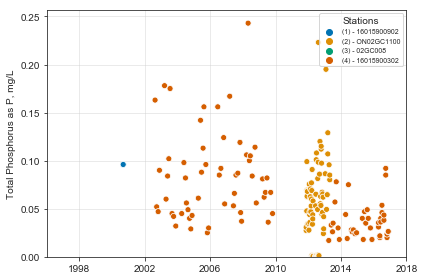

In [79]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

ax = sns.scatterplot(x='DATE', y='RESULT', data=TP, hue_order=selected_stations, hue='STATION', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Canada/'+river+'/'+river+'_TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_TP.pdf')



In [80]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
      

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
STATION     &        &       &       &       &       &       &       &       \\
\midrule
16015900902 &    2.0 &  0.10 &  0.00 &  0.10 &  0.10 &  0.10 &  0.10 &  0.10 \\
ON02GC1100  &   77.0 &  0.06 &  0.04 &  0.00 &  0.03 &  0.06 &  0.08 &  0.22 \\
02GC008     &    NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN \\
16015900302 &   95.0 &  0.06 &  0.04 &  0.02 &  0.03 &  0.05 &  0.08 &  0.24 \\
\bottomrule
\end{tabular}



In [81]:
selected_stations

[16015900902, 'ON02GC1100', '02GC008', 16015900302]

In [82]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = TP[TP.STATION.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(172, 4)

In [83]:
master_st_df.DATE = master_st_df.DATE.dt.date
# = pd.to_date(master_st_df.DATE, format="%Y-%m-%d")
# master_st_df

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [84]:
master_st_df[[
    'DATE','USGSPCode', 'RESULT']].groupby('DATE').mean().reset_index().sort_values('DATE').to_csv(
    'One_by_one/Canada/'+river+'/TP_'+river+'iver_data.csv', index=False)

### Discharge

In [75]:
river

'Nanticoke_R'

In [85]:
site = '02GC008'
discharge = WSC_FLOWS[WSC_FLOWS.index>datetime.datetime(1996,1,1)][site].to_frame()

In [86]:
discharge = discharge.reset_index()
discharge = discharge.rename(index=str, columns={site:'Discharge, cms', 'index':'Date'})
discharge['Source'] = site

In [87]:
discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028

3

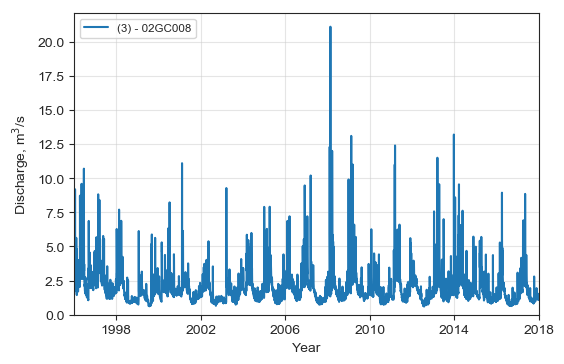

In [111]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['({}) - {}'.format(selected_stations.index(site)+1, site)], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('One_by_one/Canada/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_Q.pdf')

In [89]:
discharge[['Date', 'Flow, CFS']].to_csv('One_by_one/Canada/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### Egret

In [90]:
river

'Lynn_R'

In [91]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result/TP/'+river+'iver_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result/TP/'+river+'iver_TP_Sample.csv')


In [92]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


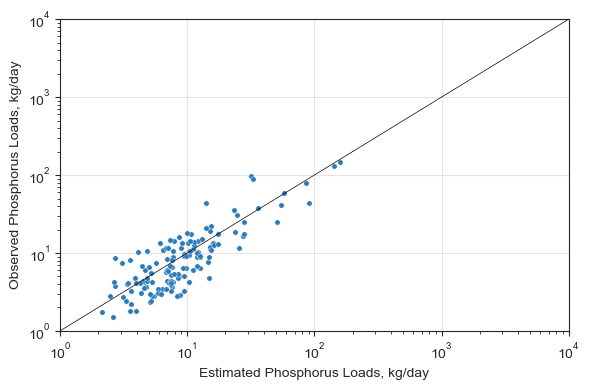

In [93]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,1000000],[-100,1000000], 'k', lw=0.5)
plt.xlim(1,10000)
plt.ylim(1,10000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_FvsF.pdf')


In [94]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


In [95]:
EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,1996,137.0,2.884251,53462.0,5.021978,138.000000,1996.375797,1757.021978,137.0,0.940474,2.884263,2.869041,-2.234110,0.469567,0.130889,35.550977,0.115746,21.093309,12.976107,6.663085
1,1997,456.0,2.571014,53781.0,6.526027,183.838356,1997.248146,1767.501370,456.0,0.856475,2.591221,2.647273,-2.356356,0.482941,0.114135,25.600167,0.101466,18.003723,9.344061,5.008198
2,1998,821.0,1.888554,54146.0,6.526027,183.838356,1998.248059,1779.501370,821.0,0.519084,1.890841,1.907181,-2.521485,0.497518,0.097356,15.864187,0.099074,17.613299,5.790428,3.187542
3,1999,1186.0,1.265708,54511.0,6.526027,183.838356,1999.248059,1791.501370,1186.0,0.158522,1.259675,1.248085,-2.678215,0.508960,0.084507,9.521609,0.096696,17.228591,3.475387,1.981695
4,2000,1551.5,2.057752,54876.5,6.513661,183.500000,2000.248661,1803.497268,1551.5,0.657731,2.056540,2.035541,-2.510549,0.497556,0.101786,19.775009,0.094407,16.883187,7.217878,4.062985
5,2001,1917.0,1.748083,55242.0,6.526027,183.838356,2001.248146,1815.501370,1917.0,0.475005,1.756098,1.787721,-2.617523,0.512139,0.089249,14.068819,0.091977,16.471899,5.135119,2.892778
6,2002,2282.0,1.661035,55607.0,6.526027,183.838356,2002.248059,1827.501370,2282.0,0.422640,1.659878,1.663208,-2.676235,0.520196,0.084595,12.697484,0.089628,16.096897,4.634582,2.696173
7,2003,2647.0,1.335455,55972.0,6.526027,183.838356,2003.248059,1839.501370,2647.0,0.211714,1.331408,1.320887,-2.765755,0.532650,0.078838,10.074090,0.087192,15.709099,3.677043,2.204287
8,2004,3012.5,2.041388,56337.5,6.513661,183.500000,2004.248661,1851.497268,3012.5,0.629030,2.046186,2.050030,-2.626026,0.527813,0.088161,16.237514,0.084660,15.324538,5.926693,3.482725
9,2005,3378.0,1.873678,56703.0,6.526027,183.838356,2005.248146,1863.501370,3378.0,0.484293,1.871677,1.873268,-2.733536,0.544620,0.079391,14.114904,0.081726,14.830896,5.151940,2.987646


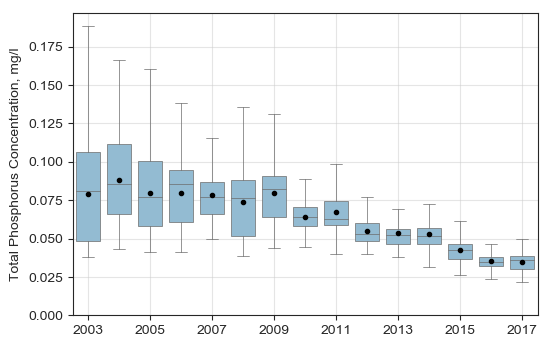

In [96]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2018))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
# plt.xlim(6.5, 18.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_PC.pdf')




In [97]:
EGRET_Daily.groupby('waterYear').mean()

,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
waterYear,,,,,,,,,,,,,,,,,,,
1996,137.0,2.884251,53462.0,5.021978,138.000000,1996.375797,1757.021978,137.0,0.940474,2.884263,2.869041,-2.234110,0.469567,0.130889,35.550977,0.115746,21.093309,12.976107,6.663085
1997,456.0,2.571014,53781.0,6.526027,183.838356,1997.248146,1767.501370,456.0,0.856475,2.591221,2.647273,-2.356356,0.482941,0.114135,25.600167,0.101466,18.003723,9.344061,5.008198
1998,821.0,1.888554,54146.0,6.526027,183.838356,1998.248059,1779.501370,821.0,0.519084,1.890841,1.907181,-2.521485,0.497518,0.097356,15.864187,0.099074,17.613299,5.790428,3.187542
1999,1186.0,1.265708,54511.0,6.526027,183.838356,1999.248059,1791.501370,1186.0,0.158522,1.259675,1.248085,-2.678215,0.508960,0.084507,9.521609,0.096696,17.228591,3.475387,1.981695
2000,1551.5,2.057752,54876.5,6.513661,183.500000,2000.248661,1803.497268,1551.5,0.657731,2.056540,2.035541,-2.510549,0.497556,0.101786,19.775009,0.094407,16.883187,7.217878,4.062985
2001,1917.0,1.748083,55242.0,6.526027,183.838356,2001.248146,1815.501370,1917.0,0.475005,1.756098,1.787721,-2.617523,0.512139,0.089249,14.068819,0.091977,16.471899,5.135119,2.892778
2002,2282.0,1.661035,55607.0,6.526027,183.838356,2002.248059,1827.501370,2282.0,0.422640,1.659878,1.663208,-2.676235,0.520196,0.084595,12.697484,0.089628,16.096897,4.634582,2.696173
2003,2647.0,1.335455,55972.0,6.526027,183.838356,2003.248059,1839.501370,2647.0,0.211714,1.331408,1.320887,-2.765755,0.532650,0.078838,10.074090,0.087192,15.709099,3.677043,2.204287
2004,3012.5,2.041388,56337.5,6.513661,183.500000,2004.248661,1851.497268,3012.5,0.629030,2.046186,2.050030,-2.626026,0.527813,0.088161,16.237514,0.084660,15.324538,5.926693,3.482725


In [98]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




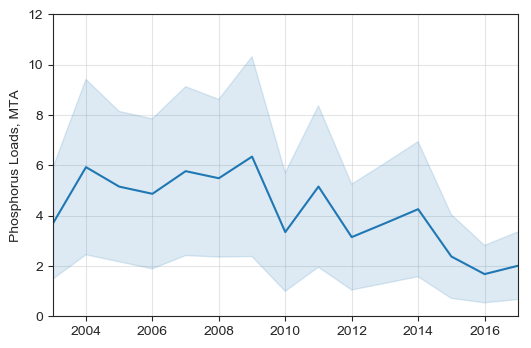

In [102]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.ylim(0,12)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_PFlux.pdf')


In [103]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
     7  &      8  &      9  &      10 &      11 &      12 &      13 &      14 &      15 &      16 &      17 &      18 &      19 &      20 &      21 \\
\midrule
 2003.0 &  2004.0 &  2005.0 &  2006.0 &  2007.0 &  2008.0 &  2009.0 &  2010.0 &  2011.0 &  2012.0 &  2013.0 &  2014.0 &  2015.0 &  2016.0 &  2017.0 \\
    3.7 &     5.9 &     5.2 &     4.9 &     5.8 &     5.5 &     6.3 &     3.3 &     5.2 &     3.1 &     3.7 &     4.3 &     2.4 &     1.7 &     2.0 \\
    2.2 &     3.5 &     3.0 &     3.0 &     3.4 &     3.1 &     4.0 &     2.4 &     3.2 &     2.1 &     2.4 &     2.7 &     1.7 &     1.1 &     1.3 \\
\bottomrule
\end{tabular}



In [104]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
1996,273.0,12.976107,11.803997,2.380592,5.788796,9.530035,16.452437,86.856358
1997,365.0,9.344061,6.632728,3.019156,5.165835,7.783455,11.533300,58.916630
1998,365.0,5.790428,4.376903,2.240047,3.068170,4.080428,6.802310,39.002012
1999,365.0,3.475387,3.000605,1.040521,2.059155,2.923616,4.423178,35.929382
2000,366.0,7.217878,6.064959,1.481552,3.761739,5.686314,8.698566,55.396793
2001,365.0,5.135119,5.842211,1.747881,2.734046,3.820058,6.450112,100.871703
2002,365.0,4.634582,3.489123,1.460247,2.332165,3.146377,5.860011,27.717522
2003,365.0,3.677043,3.837037,1.058758,1.587288,2.378536,5.119771,55.759686
2004,366.0,5.926693,4.217711,2.129394,3.171294,4.342992,7.530367,31.745543
